In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import math
import folium

In [9]:
# 남한 경계 좌표 (점 데이터)

krt = pd.read_csv('/content/drive/MyDrive/2022-2 기계학습개론/South_Korea_territory.csv')
krt

,Longitude (deg),Latitude (deg)
0,128.364919,38.624335
1,128.394784,38.578074
2,128.441417,38.505805
3,128.450694,38.474107
4,128.474457,38.426093
...,...,...
1588,128.276955,38.554056
1589,128.274785,38.571497
1590,128.281089,38.584416
1591,128.308374,38.601340


In [10]:
terr_list = []
for data in krt.index:
  terr_list.append((krt.loc[data, 'Latitude (deg)'], krt.loc[data, 'Longitude (deg)']))
terr_list

[(38.62433502800008, 128.36491946700005),
 (38.57807413300013, 128.39478358100007),
 (38.50580475500004, 128.4414168630001),
 (38.47410716400009, 128.45069420700008),
 (38.42609284100007, 128.474457227),
 (38.28896719000005, 128.56275475400003),
 (38.144964911000045, 128.63160241000003),
 (38.129299221000046, 128.64283287900003),
 (38.09430573100008, 128.6787215500001),
 (38.06492747600004, 128.69247480600006),
 (37.87677643400008, 128.85914147200003),
 (37.80231354400007, 128.9238387380001),
 (37.734361070000034, 129.001312696),
 (37.72724030200004, 129.01229902400007),
 (37.678859768000045, 129.06421959700003),
 (37.65843333500004, 129.0669051440001),
 (37.63385651200008, 129.06714928500003),
 (37.61302317900004, 129.07333418100006),
 (37.59739817900004, 129.108734571),
 (37.58063385600008, 129.118988477),
 (37.50511302300004, 129.14820397200003),
 (37.48761627800008, 129.16122480600006),
 (37.480169989000046, 129.17684980600006),
 (37.46938711100007, 129.1899520190001),
 (37.3982608

In [14]:
# 정거장 후보지 좌표 (점 데이터)

vrc = pd.read_csv('/content/drive/MyDrive/2022-2 기계학습개론/Vertiport_candidates.csv')
vrc

,Longitude (deg),Latitude (deg)
0,128.703729,37.647255
1,127.431885,35.000354
2,127.533508,37.694103
3,128.033173,37.404361
4,128.565379,36.464797
...,...,...
299,127.448181,35.174353
300,126.691373,36.702458
301,128.382054,36.982394
302,127.067473,37.358867


In [15]:
location_list = []
for data in vrc.index:
  location_list.append((vrc.loc[data, 'Latitude (deg)'], vrc.loc[data, 'Longitude (deg)']))
location_list

[(37.647254775409046, 128.7037285365526),
 (35.000354265946804, 127.43188529840032),
 (37.69410324852081, 127.5335082592866),
 (37.40436132386957, 128.033173329255),
 (36.46479668606928, 128.56537914267503),
 (38.09009554722995, 127.31802597412438),
 (38.23375601276194, 128.10157597933943),
 (34.85893601223095, 128.43082200687033),
 (37.29029220006768, 127.18039332507344),
 (37.953773157283706, 128.25661774025377),
 (36.165085526051584, 128.97339946620707),
 (35.63295255368825, 128.8176404695227),
 (38.05068944018716, 127.7300974464426),
 (36.57903901794645, 126.88959377784876),
 (35.692849265147984, 127.34072002719903),
 (35.3768041001618, 128.54616096262237),
 (37.15121053454664, 128.37103494799547),
 (36.31429471207254, 128.04551644430768),
 (36.65425037850549, 128.8514985114489),
 (37.73569070621983, 127.64554331042805),
 (35.93746413798037, 129.23510943288326),
 (35.92911907899064, 129.2434955396531),
 (37.60430954173145, 128.54733156801447),
 (36.91993790999747, 127.8816628696586

In [16]:
# 정거장 후보지에서 랜덤으로 10개 행의 데이터 추출 

initialvrc = vrc.sample(n = 10)
initialvrc

,Longitude (deg),Latitude (deg)
90,127.321247,38.156119
232,127.471413,35.505847
133,128.354843,37.672910
279,128.156382,35.489502
69,128.870223,36.433927
184,127.413256,37.064652
262,126.976228,35.005384
211,126.954134,34.703687
64,128.198179,36.208732
169,129.267995,36.305976


In [17]:
c_location_list = []
for data in initialvrc.index:
  c_location_list.append((initialvrc.loc[data, 'Latitude (deg)'], initialvrc.loc[data, 'Longitude (deg)']))
c_location_list

[(38.15611862697657, 127.32124714075808),
 (35.50584658303752, 127.4714125667743),
 (37.6729103595611, 128.35484302559556),
 (35.48950194783211, 128.15638217863875),
 (36.43392717283434, 128.87022268740935),
 (37.064651718992856, 127.41325614340718),
 (35.00538424438963, 126.97622843278744),
 (34.70368698251881, 126.95413420623188),
 (36.2087318453459, 128.19817905695388),
 (36.3059757378156, 129.26799517663062)]

In [18]:
# 지도 기본 시점 설정
# 남한 경계 주소 점 데이터를 선으로 시각화

Map = folium.Map(location=[36.220711, 128.058276], zoom_start = 7)
folium.PolyLine(terr_list, color = 'black').add_to(Map)
# tiles = 'Stamen Toner'

In [19]:
# 전체 후보지 좌표를 점으로 지도상에 검정색으로 표시
# 그 후 랜덤으로 뽑아낸 10개의 좌표를 빨간색으로 표시
# 빨간색 점은 초기 center point로 설정

for data in vrc.index:
  longt = vrc.loc[data, 'Longitude (deg)']
  lat = vrc.loc[data, 'Latitude (deg)']
  folium.CircleMarker([lat, longt], color = 'black', radius = 0.1).add_to(Map)

for data in initialvrc.index:
  longt = initialvrc.loc[data, 'Longitude (deg)']
  lat = initialvrc.loc[data, 'Latitude (deg)']
  folium.CircleMarker([lat, longt], color = 'red', radius = 0.1).add_to(Map)

Map

In [20]:
# 각 점 사이의 euclidean distance를 계산하는 함수 정의

def distance(x1, y1, x2, y2):
    result = math.sqrt(math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

In [21]:
c = c_location_list # 랜덤으로 뽑아낸 (10개의) 좌표 리스트
p = location_list # 전체 후보지 좌표 리스트
pdis = [] # 각각의 점에서 center point까지의 거리를 계산한 후 빈 리스트에 저장할 예정
n1 = [] # 빈 리스트 생성, 각각의 리스트에 n번째 클러스터에 포함된 좌표값이 저장될 예정
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
n9 = []
n10 = []
m = [n1, n2, n3, n4, n5, n6, n7, n8, n9, n10] # 인덱싱을 쉽게 하기 위해 2차원 리스트로 생성

for i in list(range(len(p))):
  pdis.append([])
  for o in list(range(len(c))):
    pdis[i].append(distance(p[i][0], p[i][1], c[o][0], c[o][1]))

pdis # 리스트 안에 각 점에서 10개의 center point까지의 거리 정보가 저장됨. 리스트 내의 리스트에는 모두 10개의 원소가 들어있음

[[1.4731589286801758,
  2.4706743402817226,
  0.34982754144569955,
  2.2260919344083296,
  1.2246975844832872,
  1.4158902919421255,
  3.1565386915381635,
  3.424276810076997,
  1.5247716211419977,
  1.455137896486973],
 [3.1577032007888404,
  0.507035390858318,
  2.827438246841885,
  0.8741631336135104,
  2.0307500397595226,
  2.0643815102999192,
  0.45568462763548406,
  0.5623678361399017,
  1.4308677432916586,
  2.2529862211606493],
 [0.5084417295704614,
  2.189137526301317,
  0.8216081407156561,
  2.290903493036626,
  1.837076265179016,
  0.6408352357654507,
  2.7458642880155435,
  3.046024250941283,
  1.6273031293036475,
  2.221563155171193],
 [1.0353636755471272,
  1.979882162003459,
  0.41903457866228677,
  1.918819129195102,
  1.2815592337001451,
  0.7068945699006072,
  2.6214926172009183,
  2.908258469779612,
  1.2069617807073358,
  1.652645119318508],
 [2.0996271921434766,
  1.4547673935349856,
  1.2263213708782899,
  1.0575813647299181,
  0.30640253525966565,
  1.29892781399

In [22]:
Map = folium.Map(location=[36.220711, 128.058276], zoom_start = 7) # 지도 초기화
folium.PolyLine(terr_list, color = 'black').add_to(Map) # 남한 영역 표시

# 위에서 생성한 리스트의 인덱스 순서를 이용하여 각 점에서부터 몇 번째 center point까지의 거리가 가장 짧은지 반복문을 이용하여 구함

for i in list(range(len(p))): 
  print(i + 1, "번째 점은", pdis[i].index(min(pdis[i])) + 1, "번째 Center와 가장 가깝습니다.") 
  if (pdis[i].index(min(pdis[i])) + 1) == 1: # 만약 첫 번째 center point와 가장 가깝다면,
    n1.append(p[i]) # 1번째 클러스터에 속한 점들의 좌표를 n1 리스트에 저장
    folium.CircleMarker(p[i], color = 'red', radius = 0.1).add_to(Map) # 지도에는 빨간색으로 나타내기
  if (pdis[i].index(min(pdis[i])) + 1) == 2:
    n2.append(p[i])
    folium.CircleMarker(p[i], color = 'blue', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 3:
    n3.append(p[i])
    folium.CircleMarker(p[i], color = 'green', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 4:
    n4.append(p[i])
    folium.CircleMarker(p[i], color = 'yellow', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 5:
    n5.append(p[i])
    folium.CircleMarker(p[i], color = 'purple', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 6:
    n6.append(p[i])
    folium.CircleMarker(p[i], color = 'darkorange', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 7:
    n7.append(p[i])
    folium.CircleMarker(p[i], color = 'lime', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 8:
    n8.append(p[i])
    folium.CircleMarker(p[i], color = 'lightseagreen', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 9:
    n9.append(p[i])
    folium.CircleMarker(p[i], color = 'darkviolet', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 10:
    n10.append(p[i])
    folium.CircleMarker(p[i], color = 'firebrick', radius = 0.1).add_to(Map)

for i in range(0, 10):
  print(i + 1, "번째 클러스터 원소의 개수는", len(m[i])) # 각 클러스터 리스트에 저장한 후, 각 클러스터에 몇 개의 원소(좌표)가 들어있는지 출력

Map

1 번째 점은 3 번째 Center와 가장 가깝습니다.
2 번째 점은 7 번째 Center와 가장 가깝습니다.
3 번째 점은 1 번째 Center와 가장 가깝습니다.
4 번째 점은 3 번째 Center와 가장 가깝습니다.
5 번째 점은 5 번째 Center와 가장 가깝습니다.
6 번째 점은 1 번째 Center와 가장 가깝습니다.
7 번째 점은 3 번째 Center와 가장 가깝습니다.
8 번째 점은 4 번째 Center와 가장 가깝습니다.
9 번째 점은 6 번째 Center와 가장 가깝습니다.
10 번째 점은 3 번째 Center와 가장 가깝습니다.
11 번째 점은 5 번째 Center와 가장 가깝습니다.
12 번째 점은 4 번째 Center와 가장 가깝습니다.
13 번째 점은 1 번째 Center와 가장 가깝습니다.
14 번째 점은 6 번째 Center와 가장 가깝습니다.
15 번째 점은 2 번째 Center와 가장 가깝습니다.
16 번째 점은 4 번째 Center와 가장 가깝습니다.
17 번째 점은 3 번째 Center와 가장 가깝습니다.
18 번째 점은 9 번째 Center와 가장 가깝습니다.
19 번째 점은 5 번째 Center와 가장 가깝습니다.
20 번째 점은 1 번째 Center와 가장 가깝습니다.
21 번째 점은 10 번째 Center와 가장 가깝습니다.
22 번째 점은 10 번째 Center와 가장 가깝습니다.
23 번째 점은 3 번째 Center와 가장 가깝습니다.
24 번째 점은 6 번째 Center와 가장 가깝습니다.
25 번째 점은 2 번째 Center와 가장 가깝습니다.
26 번째 점은 5 번째 Center와 가장 가깝습니다.
27 번째 점은 6 번째 Center와 가장 가깝습니다.
28 번째 점은 6 번째 Center와 가장 가깝습니다.
29 번째 점은 6 번째 Center와 가장 가깝습니다.
30 번째 점은 5 번째 Center와 가장 가깝습니다.
31 번째 점은 6 번째 Center와 가장 가깝습니다.
32 번째 점은 3 번째 C

In [23]:
# 새로운 center point를 구하기 위한 과정

list1 = []
list2 = []

for o in list(range(len(c))): # 새로운 10개의 center point 인덱스 0~9
  for i in list(range(len(m[o]))): # 각 클러스터 내에 들어있는 원소의 수 range화
    list1.append([]) 
    list1[o].append(m[o][i][0]) # 역시 인덱싱을 편하게 하기 위해 2차원 리스트로 생성하여 각각의 클러스터 별로 순서대로 저장
    list2.append([])
    list2[o].append(m[o][i][1])
  if len(list1) == 0: # 만약 (그럴 일은 없겠지만) 특정 클러스터 원소의 개수가 0개라면, 실행하지 않고 그대로 진행
    continue
  else: # 한 클러스터 내에 있는 좌표들의 평균값을 계산하여 새로운 center point를 생성하고, 저장
    c[o] = (sum(list1[o]) / len(list1[o]), sum(list2[o]) / len(list2[o]))

Map = folium.Map(location=[36.220711, 128.058276], zoom_start = 7) # 지도 초기화
folium.PolyLine(terr_list, color = 'black').add_to(Map)

cnt = 1 # iteration 횟수를 cnt에 저장 (한바퀴 실행했으므로 초기 실행횟수는 1)

for i in range(0, 10):
  folium.CircleMarker(c[i], color = 'red', radius = 0.1).add_to(Map)
Map # 새롭게 생성된 center point 10곳을 지도에 표시

# ↑ 첫 번째 iteration
# ↓ 앞으로의 iteration은 아래 코드 반복하여 실행

In [32]:
# 위 과정과 동일하게 반복
# 이 코드를 반복해서 실행하여 횟수를 늘린다.

cnt += 1 # 실행 횟수 + 1

list1 = []
list2 = []

for o in list(range(len(c))):
  for i in list(range(len(m[o]))):
    list1.append([])
    list1[o].append(m[o][i][0])
    list2.append([])
    list2[o].append(m[o][i][1])
  if len(list1) == 0:
    continue
  else:
    c[o] = (sum(list1[o]) / len(list1[o]), sum(list2[o]) / len(list2[o]))

pdis = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
n9 = []
n10 = []
m = [n1, n2, n3, n4, n5, n6, n7, n8, n9, n10]

for i in list(range(len(p))):
  pdis.append([])
  for o in list(range(len(c))):
    pdis[i].append(distance(p[i][0], p[i][1], c[o][0], c[o][1]))

Map = folium.Map(location=[36.220711, 128.058276], zoom_start = 7)
folium.PolyLine(terr_list, color = 'black').add_to(Map)

for i in list(range(len(p))):
  print(i + 1, "번째 점은", pdis[i].index(min(pdis[i])) + 1, "번째 Center와 가장 가깝습니다.")
  if (pdis[i].index(min(pdis[i])) + 1) == 1:
    n1.append(p[i])
    folium.CircleMarker(p[i], color = 'red', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 2:
    n2.append(p[i])
    folium.CircleMarker(p[i], color = 'blue', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 3:
    n3.append(p[i])
    folium.CircleMarker(p[i], color = 'green', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 4:
    n4.append(p[i])
    folium.CircleMarker(p[i], color = 'yellow', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 5:
    n5.append(p[i])
    folium.CircleMarker(p[i], color = 'purple', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 6:
    n6.append(p[i])
    folium.CircleMarker(p[i], color = 'darkorange', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 7:
    n7.append(p[i])
    folium.CircleMarker(p[i], color = 'lime', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 8:
    n8.append(p[i])
    folium.CircleMarker(p[i], color = 'lightseagreen', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 9:
    n9.append(p[i])
    folium.CircleMarker(p[i], color = 'darkviolet', radius = 0.1).add_to(Map)
  if (pdis[i].index(min(pdis[i])) + 1) == 10:
    n10.append(p[i])
    folium.CircleMarker(p[i], color = 'firebrick', radius = 0.1).add_to(Map)

print(cnt, "번째 iteration") # 몇 번째 iteration인지 cnt 변수를 이용하여 출력

Map

1 번째 점은 3 번째 Center와 가장 가깝습니다.
2 번째 점은 8 번째 Center와 가장 가깝습니다.
3 번째 점은 1 번째 Center와 가장 가깝습니다.
4 번째 점은 3 번째 Center와 가장 가깝습니다.
5 번째 점은 9 번째 Center와 가장 가깝습니다.
6 번째 점은 1 번째 Center와 가장 가깝습니다.
7 번째 점은 3 번째 Center와 가장 가깝습니다.
8 번째 점은 4 번째 Center와 가장 가깝습니다.
9 번째 점은 1 번째 Center와 가장 가깝습니다.
10 번째 점은 3 번째 Center와 가장 가깝습니다.
11 번째 점은 10 번째 Center와 가장 가깝습니다.
12 번째 점은 4 번째 Center와 가장 가깝습니다.
13 번째 점은 3 번째 Center와 가장 가깝습니다.
14 번째 점은 6 번째 Center와 가장 가깝습니다.
15 번째 점은 2 번째 Center와 가장 가깝습니다.
16 번째 점은 4 번째 Center와 가장 가깝습니다.
17 번째 점은 5 번째 Center와 가장 가깝습니다.
18 번째 점은 9 번째 Center와 가장 가깝습니다.
19 번째 점은 5 번째 Center와 가장 가깝습니다.
20 번째 점은 1 번째 Center와 가장 가깝습니다.
21 번째 점은 10 번째 Center와 가장 가깝습니다.
22 번째 점은 10 번째 Center와 가장 가깝습니다.
23 번째 점은 3 번째 Center와 가장 가깝습니다.
24 번째 점은 9 번째 Center와 가장 가깝습니다.
25 번째 점은 2 번째 Center와 가장 가깝습니다.
26 번째 점은 5 번째 Center와 가장 가깝습니다.
27 번째 점은 6 번째 Center와 가장 가깝습니다.
28 번째 점은 6 번째 Center와 가장 가깝습니다.
29 번째 점은 1 번째 Center와 가장 가깝습니다.
30 번째 점은 10 번째 Center와 가장 가깝습니다.
31 번째 점은 1 번째 Center와 가장 가깝습니다.
32 번째 점은 3 번째

In [33]:
# 새롭게 생성된 10개의 center point만 따로 지도에 표시

list1 = []
list2 = []

for o in list(range(len(c))):
  for i in list(range(len(m[o]))):
    list1.append([])
    list1[o].append(m[o][i][0])
    list2.append([])
    list2[o].append(m[o][i][1])
  if len(list1) == 0:
    continue
  else:
    c[o] = (sum(list1[o]) / len(list1[o]), sum(list2[o]) / len(list2[o]))

Map = folium.Map(location=[36.220711, 128.058276], zoom_start = 7)
folium.PolyLine(terr_list, color = 'black').add_to(Map)

for i in range(0, 10):
  folium.Marker(c[i], color = 'blue', radius = 0.1).add_to(Map)
Map

# 번외: K 값 결정 (블로그 참고)
# 출처 : (https://jimmy-ai.tistory.com/52)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 두 가지 feature(위도, 경도)를 대상
data = vrc[['Longitude (deg)', 'Latitude (deg)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

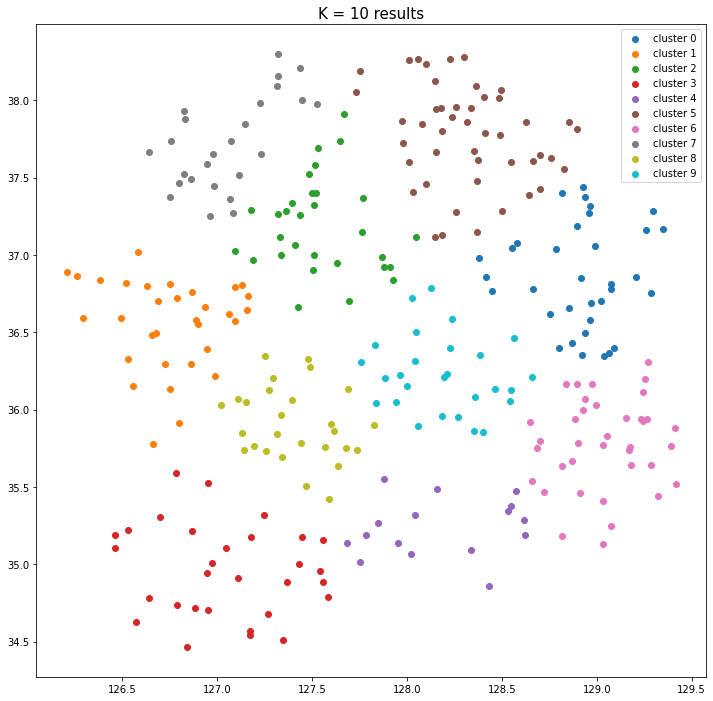

In [35]:
k = 10

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
vrc['cluster'] = model.fit_predict(data_scale)

plt.figure(figsize = (12, 12))

for i in range(k):
    plt.scatter(vrc.loc[vrc['cluster'] == i, 'Longitude (deg)'], vrc.loc[vrc['cluster'] == i, 'Latitude (deg)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('', size = 12)
plt.ylabel('', size = 12)
plt.show()

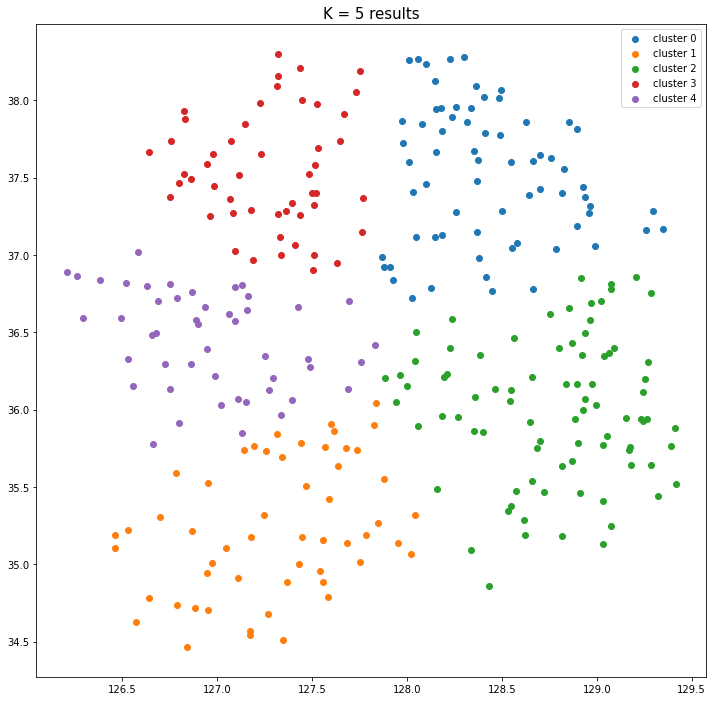

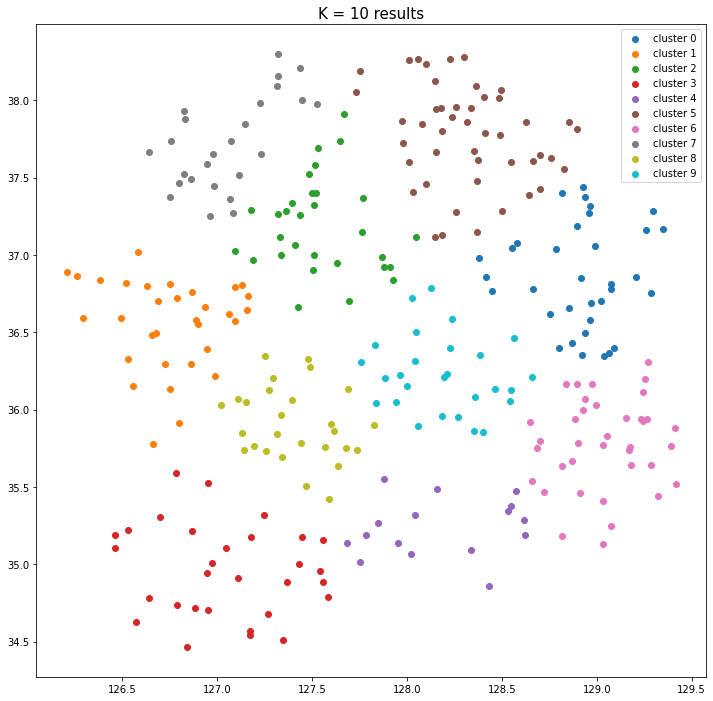

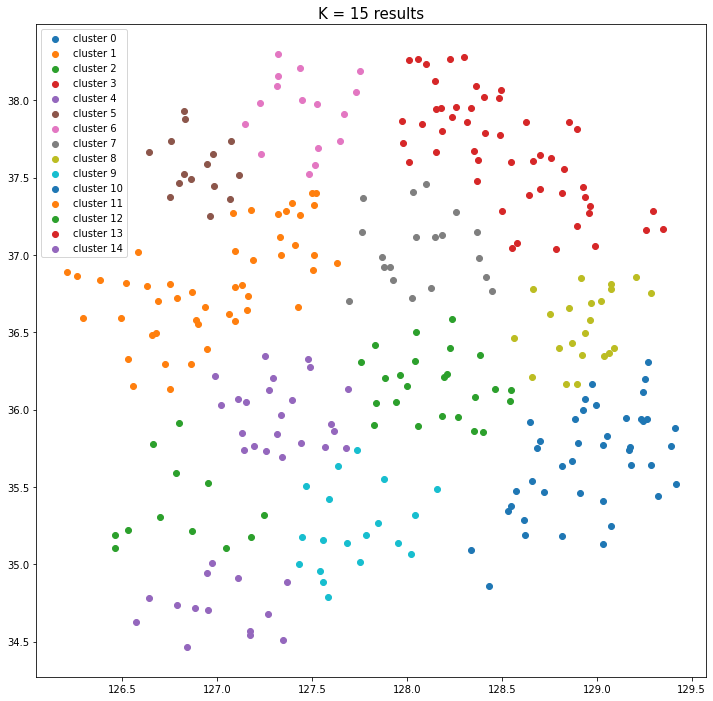

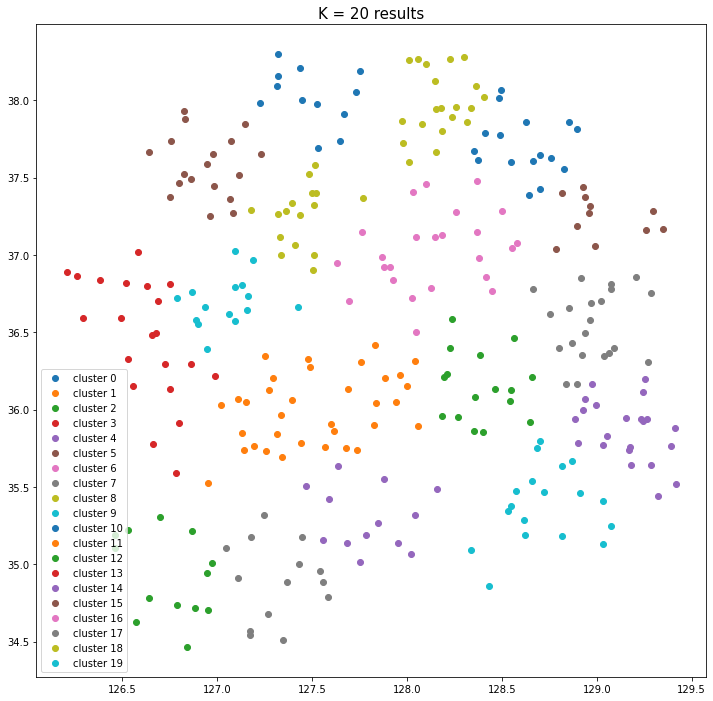

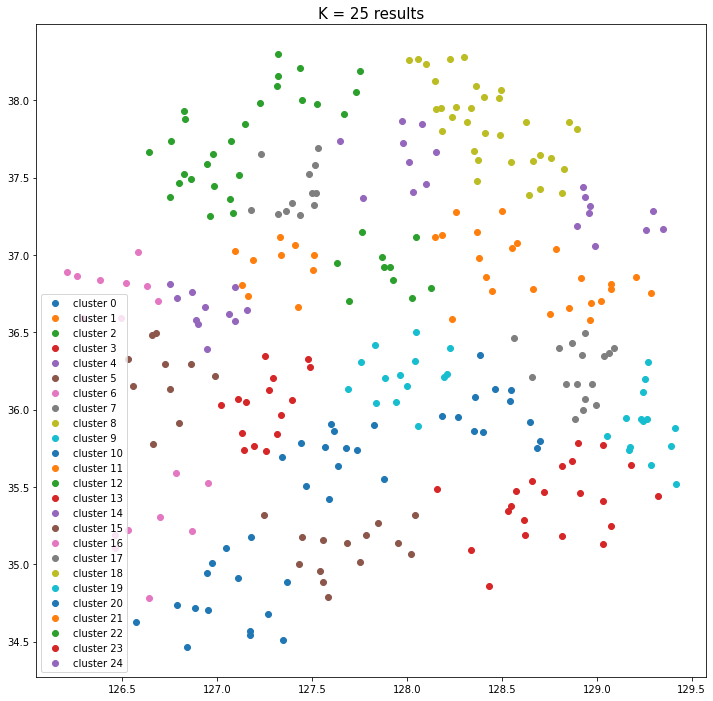

In [36]:
# K 값이 각각 5, 10, 15, 20, 25일때 k-means 클러스터링 결과

ll = [5, 10, 15, 20, 25]

for i in ll:
  k = i

  # 그룹 수, random_state 설정
  model = KMeans(n_clusters = k, random_state = 10)

  # 정규화된 데이터에 학습
  model.fit(data_scale)

  # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
  vrc['cluster'] = model.fit_predict(data_scale)

  plt.figure(figsize = (12, 12))

  for i in range(k):
      plt.scatter(vrc.loc[vrc['cluster'] == i, 'Longitude (deg)'], vrc.loc[vrc['cluster'] == i, 'Latitude (deg)'], label = 'cluster ' + str(i))

  plt.legend()
  plt.title('K = %d results'%k , size = 15)
  plt.xlabel('', size = 12)
  plt.ylabel('', size = 12)
  plt.show()

# k값이 얼마일 때 clustering이 가장 잘 되었는지...?